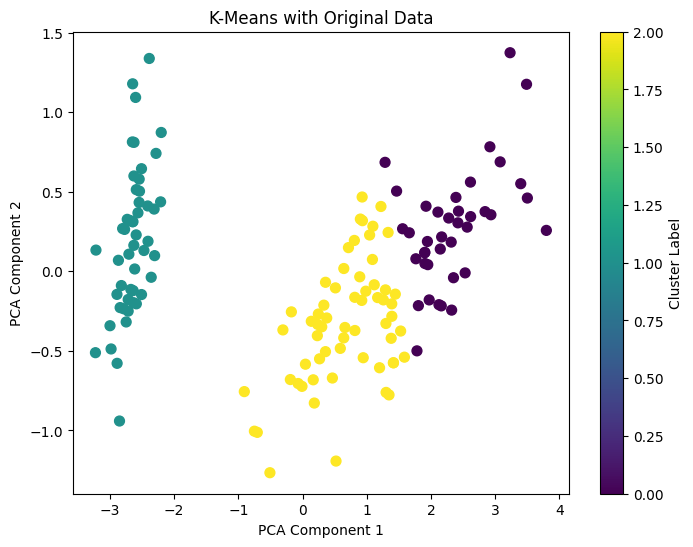


K-Means with Original Data (n_clusters=3)
Silhouette Score: 0.5977
Calinski-Harabasz Score: 693.7084
Davies-Bouldin Score: 0.5648



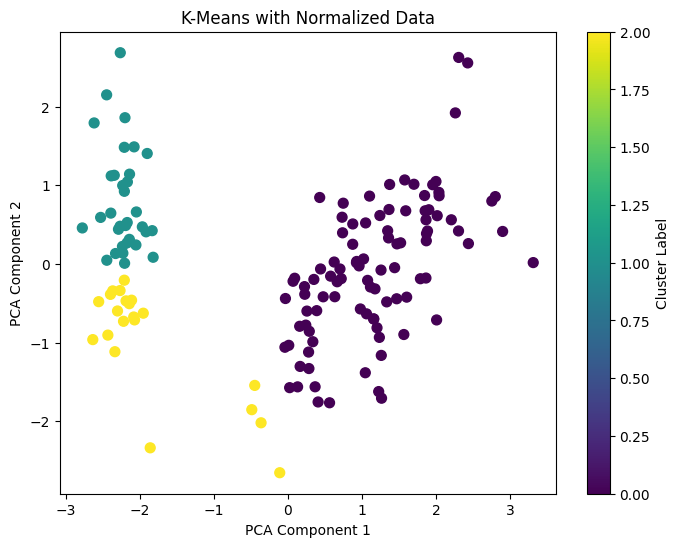


K-Means with Normalized Data (n_clusters=3)
Silhouette Score: 0.5228
Calinski-Harabasz Score: 180.9755
Davies-Bouldin Score: 0.7391



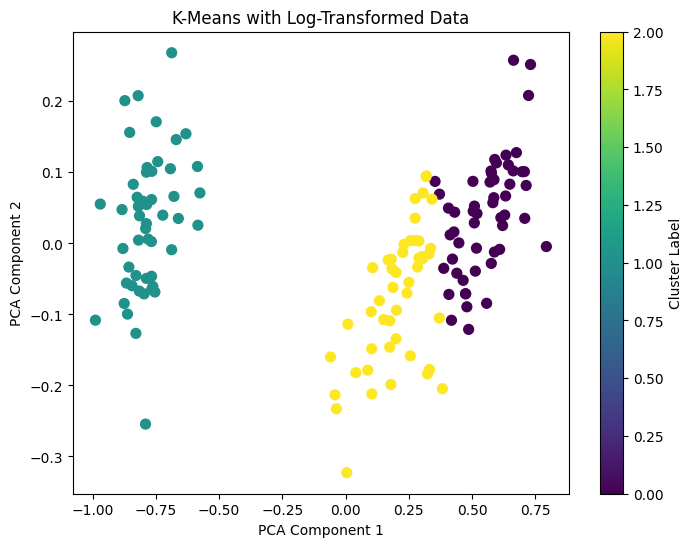


K-Means with Log-Transformed Data (n_clusters=3)
Silhouette Score: 0.6194
Calinski-Harabasz Score: 1279.7259
Davies-Bouldin Score: 0.5320



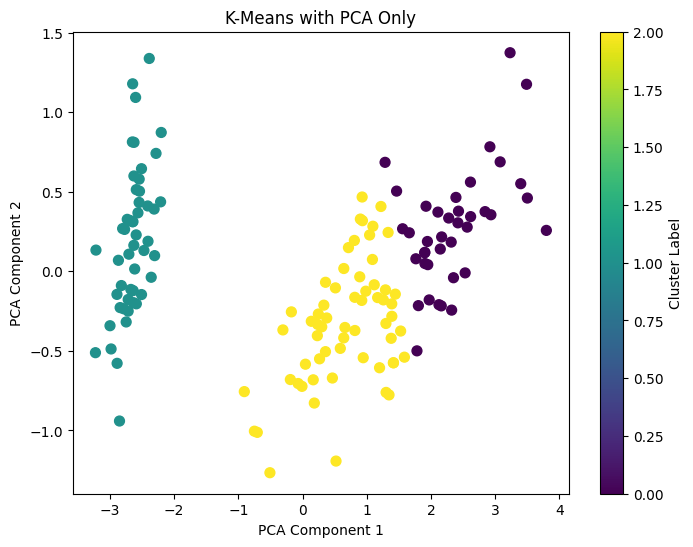


K-Means with PCA Only (n_clusters=3)
Silhouette Score: 0.5977
Calinski-Harabasz Score: 693.7084
Davies-Bouldin Score: 0.5648



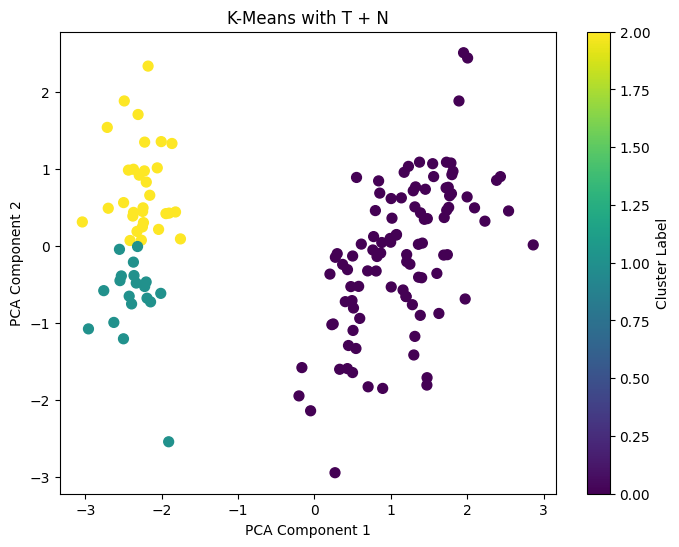


K-Means with T + N (n_clusters=3)
Silhouette Score: 0.5602
Calinski-Harabasz Score: 207.2444
Davies-Bouldin Score: 0.5997



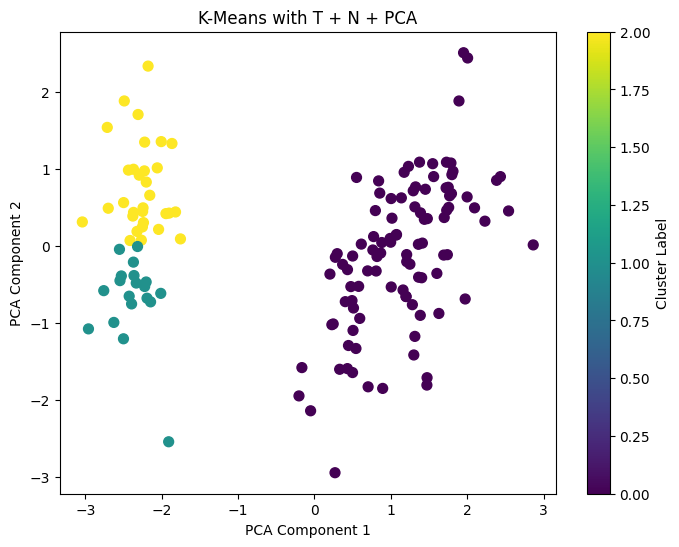


K-Means with T + N + PCA (n_clusters=3)
Silhouette Score: 0.5602
Calinski-Harabasz Score: 207.2444
Davies-Bouldin Score: 0.5997



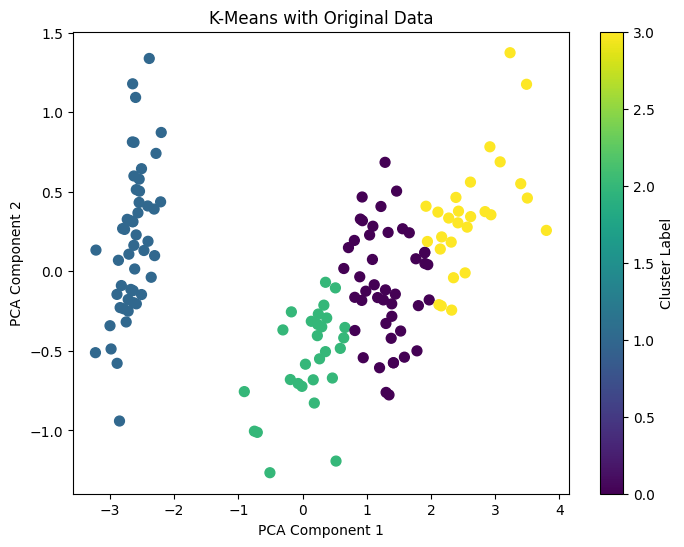


K-Means with Original Data (n_clusters=4)
Silhouette Score: 0.5577
Calinski-Harabasz Score: 719.1235
Davies-Bouldin Score: 0.6151



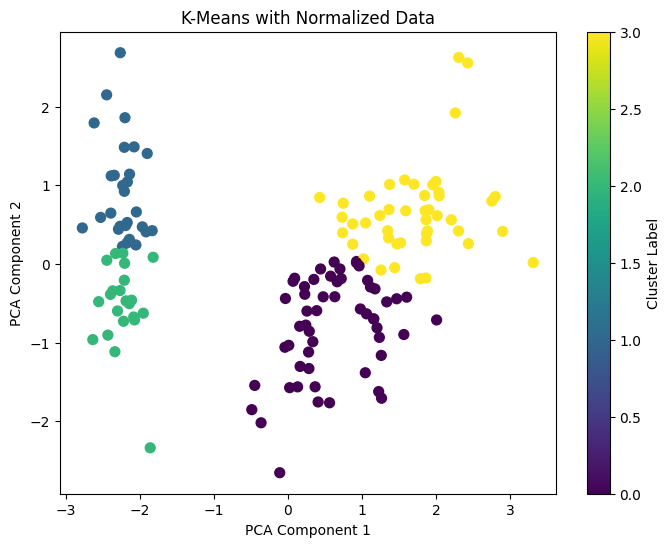


K-Means with Normalized Data (n_clusters=4)
Silhouette Score: 0.4452
Calinski-Harabasz Score: 263.8840
Davies-Bouldin Score: 0.7447



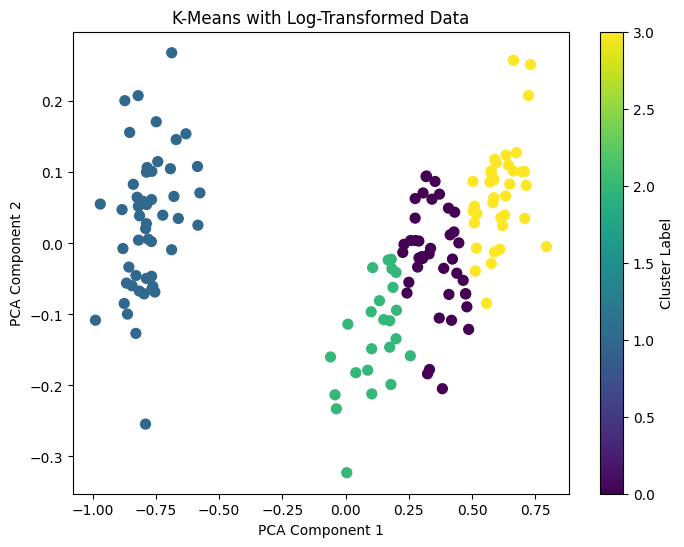


K-Means with Log-Transformed Data (n_clusters=4)
Silhouette Score: 0.5803
Calinski-Harabasz Score: 1230.0584
Davies-Bouldin Score: 0.6160



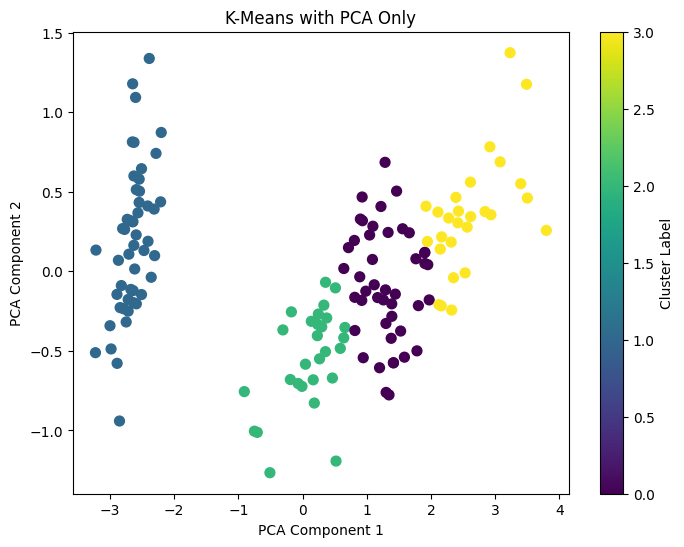


K-Means with PCA Only (n_clusters=4)
Silhouette Score: 0.5577
Calinski-Harabasz Score: 719.1235
Davies-Bouldin Score: 0.6151



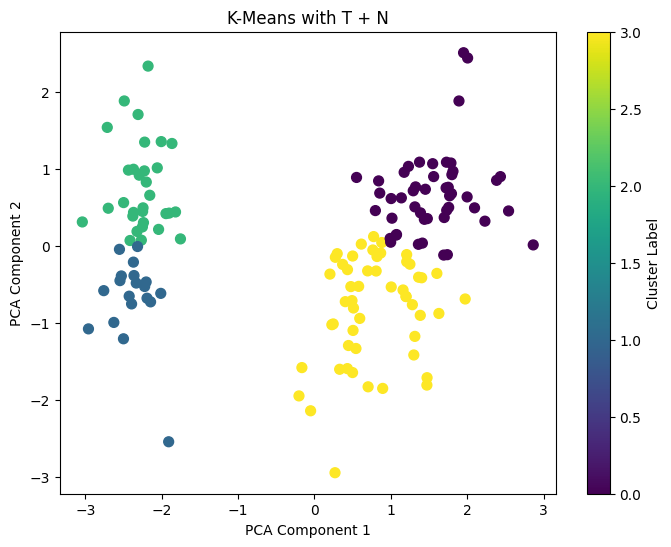


K-Means with T + N (n_clusters=4)
Silhouette Score: 0.4503
Calinski-Harabasz Score: 301.7149
Davies-Bouldin Score: 0.7462



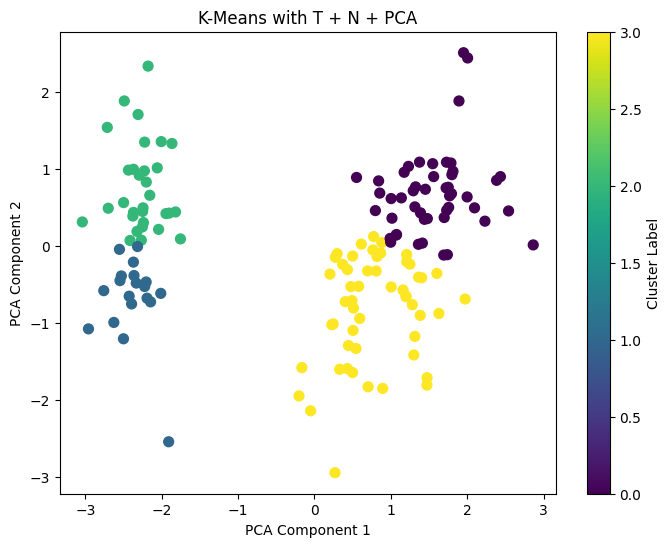


K-Means with T + N + PCA (n_clusters=4)
Silhouette Score: 0.4503
Calinski-Harabasz Score: 301.7149
Davies-Bouldin Score: 0.7462



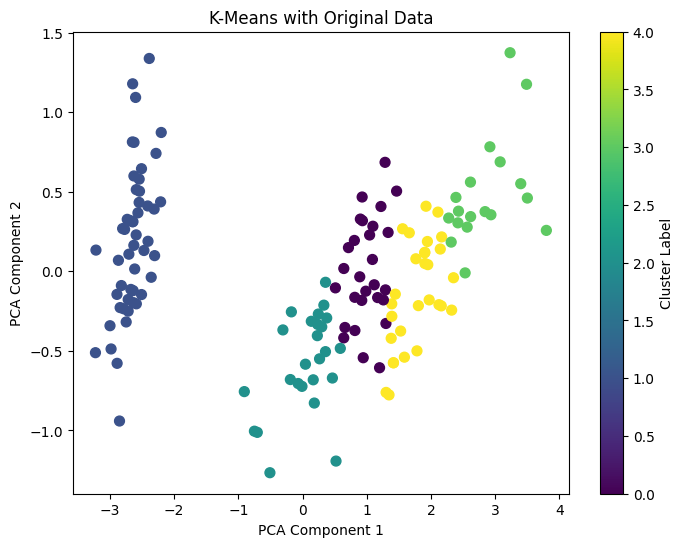


K-Means with Original Data (n_clusters=5)
Silhouette Score: 0.5100
Calinski-Harabasz Score: 642.0607
Davies-Bouldin Score: 0.7525



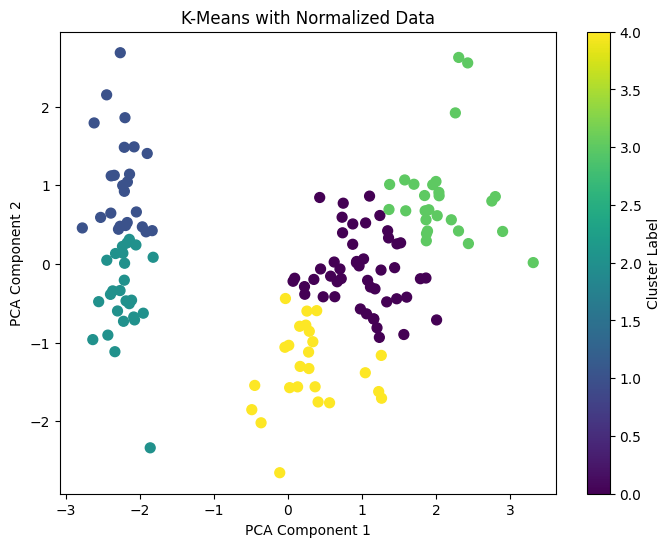


K-Means with Normalized Data (n_clusters=5)
Silhouette Score: 0.4111
Calinski-Harabasz Score: 278.4514
Davies-Bouldin Score: 0.7803



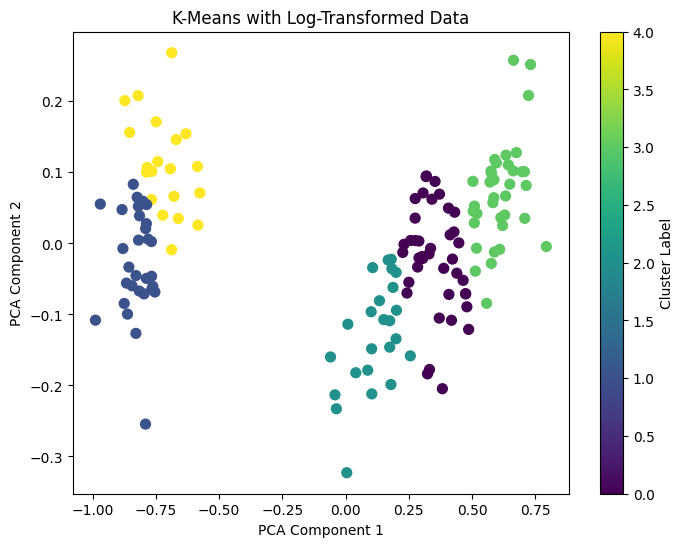


K-Means with Log-Transformed Data (n_clusters=5)
Silhouette Score: 0.4342
Calinski-Harabasz Score: 1135.6687
Davies-Bouldin Score: 0.8458



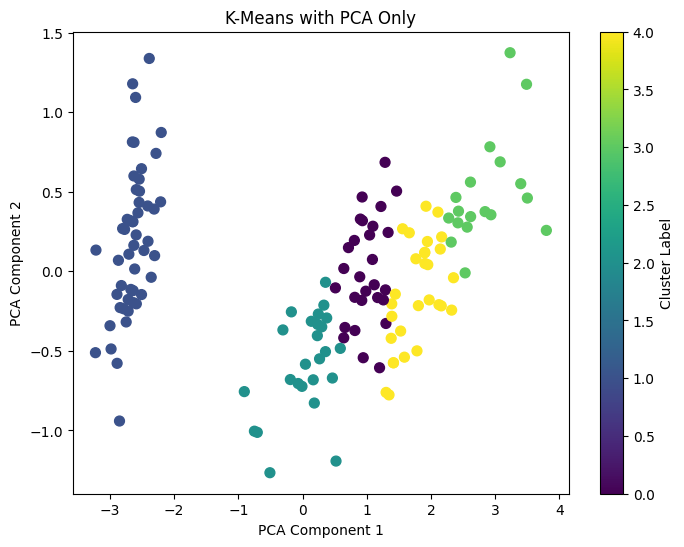


K-Means with PCA Only (n_clusters=5)
Silhouette Score: 0.5100
Calinski-Harabasz Score: 642.0607
Davies-Bouldin Score: 0.7525



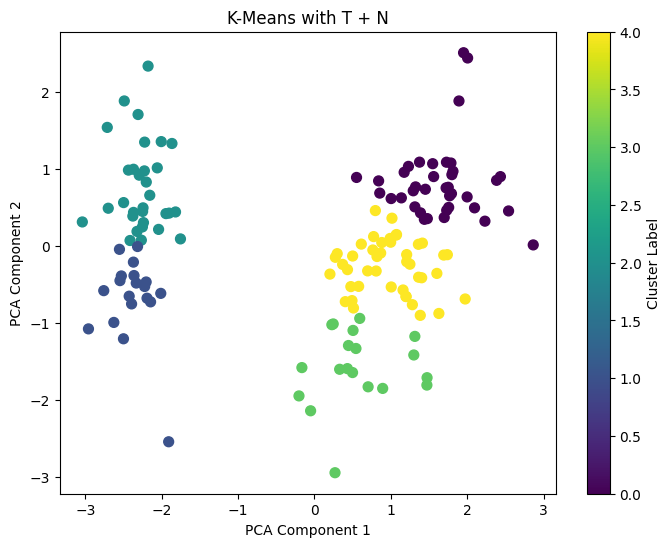


K-Means with T + N (n_clusters=5)
Silhouette Score: 0.4309
Calinski-Harabasz Score: 319.0833
Davies-Bouldin Score: 0.7691



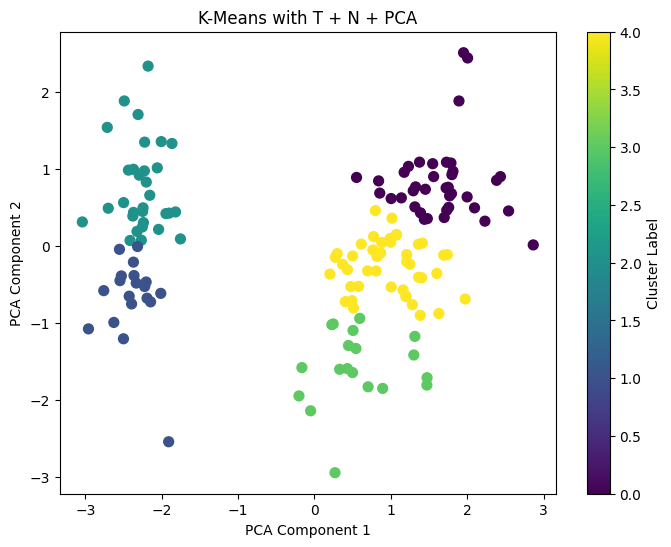


K-Means with T + N + PCA (n_clusters=5)
Silhouette Score: 0.4309
Calinski-Harabasz Score: 319.0833
Davies-Bouldin Score: 0.7691


Summary of Clustering Results:
                  Method  n_clusters  Silhouette Score  \
0          Original Data           3          0.597676   
1        Normalized Data           3          0.522791   
2   Log-Transformed Data           3          0.619360   
3               PCA Only           3          0.597676   
4                  T + N           3          0.560168   
5            T + N + PCA           3          0.560168   
6          Original Data           4          0.557741   
7        Normalized Data           4          0.445187   
8   Log-Transformed Data           4          0.580323   
9               PCA Only           4          0.557741   
10                 T + N           4          0.450322   
11           T + N + PCA           4          0.450322   
12         Original Data           5          0.510041   
13       Normalized Data  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Function to apply log transformation
def apply_transformation(X, method='log'):
    if method == 'log':
        return np.log1p(X)  # log(1 + X) to avoid negative values
    elif method == 'sqrt':
        return np.sqrt(X)  # square root transformation
    else:
        return X

# Apply PCA (for dimensionality reduction)
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Plot clusters for PCA-reduced data
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Perform K-Means Clustering and display metrics with optional plotting
def kmeans_clustering(X, n_clusters=3, title="K-Means Clustering"):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(X)

    # Plot clusters
    plot_clusters(X, clusters, title)

    # Evaluation metrics
    silhouette_avg = silhouette_score(X, clusters)
    calinski_harabasz = calinski_harabasz_score(X, clusters)
    davies_bouldin = davies_bouldin_score(X, clusters)

    # Print metrics summary
    print(f"\n{title} (n_clusters={n_clusters})")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}\n")

    return silhouette_avg, calinski_harabasz, davies_bouldin

# Run K-Means clustering for multiple preprocessing methods
def run_kmeans_clustering(X, cluster_values=[3, 4, 5]):
    # Store results for the table
    results = {
        "Method": [],
        "n_clusters": [],
        "Silhouette Score": [],
        "Calinski-Harabasz Score": [],
        "Davies-Bouldin Score": []
    }

    methods = [
        "Original Data",
        "Normalized Data",
        "Log-Transformed Data",
        "PCA Only",
        "T + N",
        "T + N + PCA"
    ]

    for n_clusters in cluster_values:
        for method in methods:
            if method == "Original Data":
                X_pca = apply_pca(X, n_components=2)
            elif method == "Normalized Data":
                scaler = StandardScaler()
                X_normalized = scaler.fit_transform(X)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "Log-Transformed Data":
                X_transformed = apply_transformation(X, method='log')
                X_pca = apply_pca(X_transformed, n_components=2)
            elif method == "PCA Only":
                X_pca = apply_pca(X, n_components=2)
            elif method == "T + N":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "T + N + PCA":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)

            # Run K-Means clustering, generate plot, and print metrics summary
            silhouette_avg, calinski_harabasz, davies_bouldin = kmeans_clustering(X_pca, n_clusters=n_clusters, title=f"K-Means with {method}")

            # Store results in the table
            results["Method"].append(method)
            results["n_clusters"].append(n_clusters)
            results["Silhouette Score"].append(silhouette_avg)
            results["Calinski-Harabasz Score"].append(calinski_harabasz)
            results["Davies-Bouldin Score"].append(davies_bouldin)

    # Create a DataFrame from the results
    df_results = pd.DataFrame(results)

    # Print the final summary table
    print("\nSummary of Clustering Results:")
    print(df_results)
    return df_results

# Run K-Means clustering and generate plots with metric summaries and a final summary table
kmeans_results = run_kmeans_clustering(X, cluster_values=[3, 4, 5])


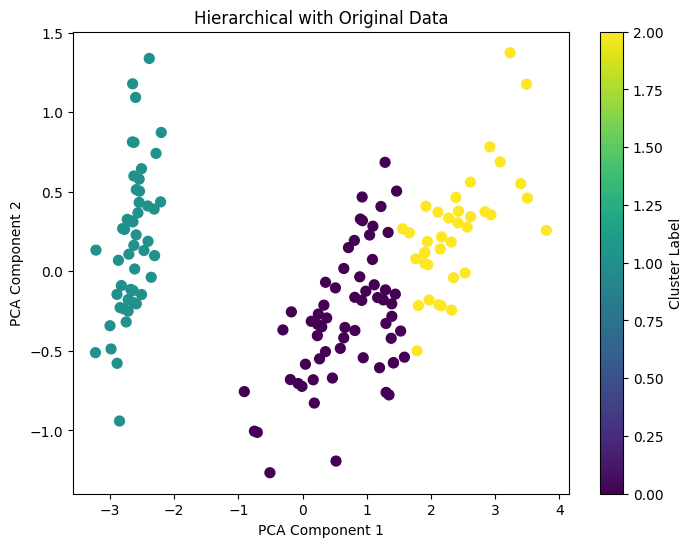


Hierarchical with Original Data (n_clusters=3)
Silhouette Score: 0.5985
Calinski-Harabasz Score: 688.6175
Davies-Bouldin Score: 0.5605



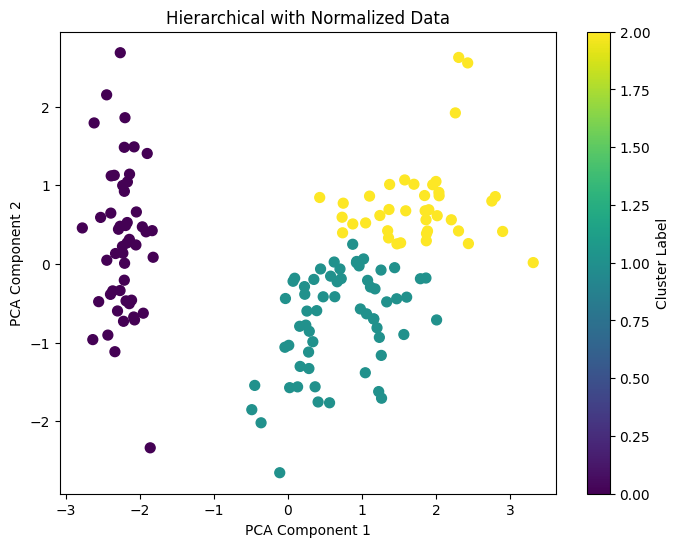


Hierarchical with Normalized Data (n_clusters=3)
Silhouette Score: 0.5111
Calinski-Harabasz Score: 286.3287
Davies-Bouldin Score: 0.7054



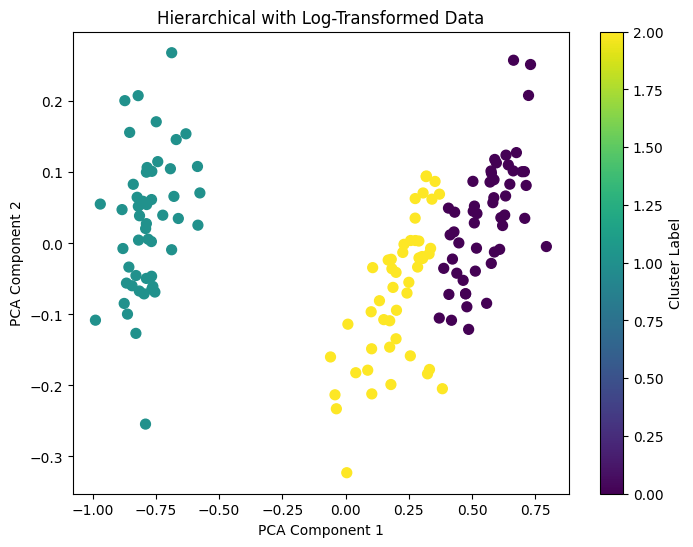


Hierarchical with Log-Transformed Data (n_clusters=3)
Silhouette Score: 0.6162
Calinski-Harabasz Score: 1259.3533
Davies-Bouldin Score: 0.5385



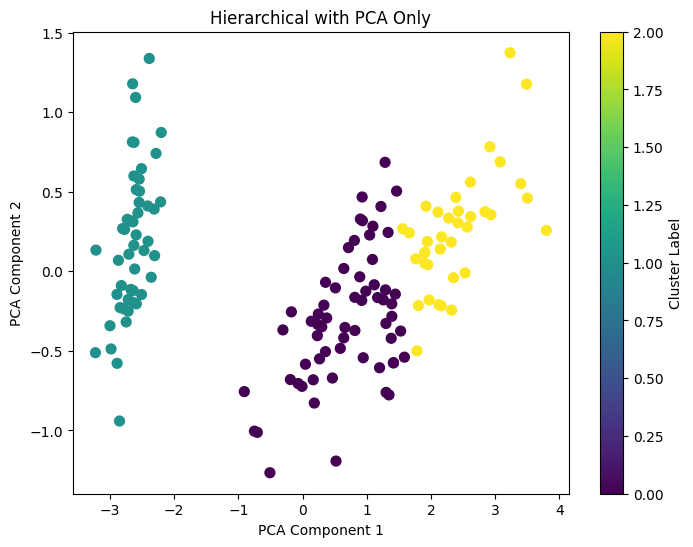


Hierarchical with PCA Only (n_clusters=3)
Silhouette Score: 0.5985
Calinski-Harabasz Score: 688.6175
Davies-Bouldin Score: 0.5605



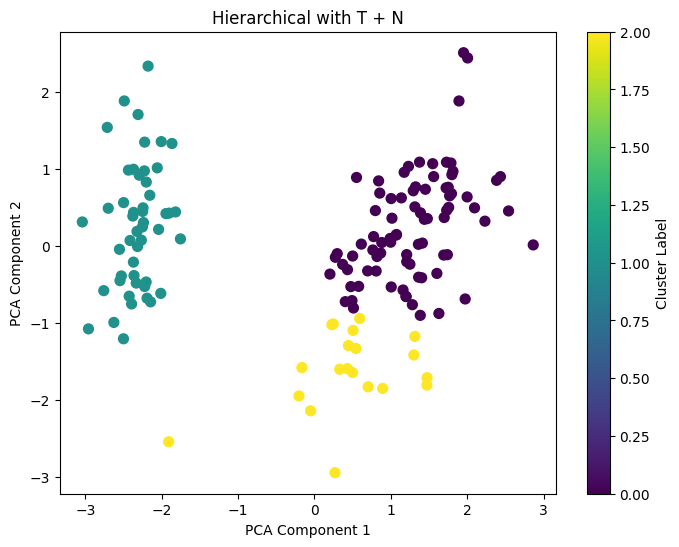


Hierarchical with T + N (n_clusters=3)
Silhouette Score: 0.5361
Calinski-Harabasz Score: 294.1774
Davies-Bouldin Score: 0.6267



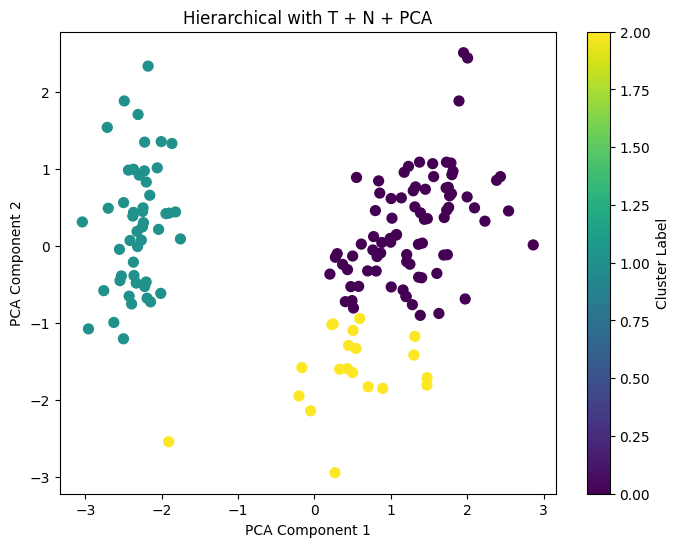


Hierarchical with T + N + PCA (n_clusters=3)
Silhouette Score: 0.5361
Calinski-Harabasz Score: 294.1774
Davies-Bouldin Score: 0.6267



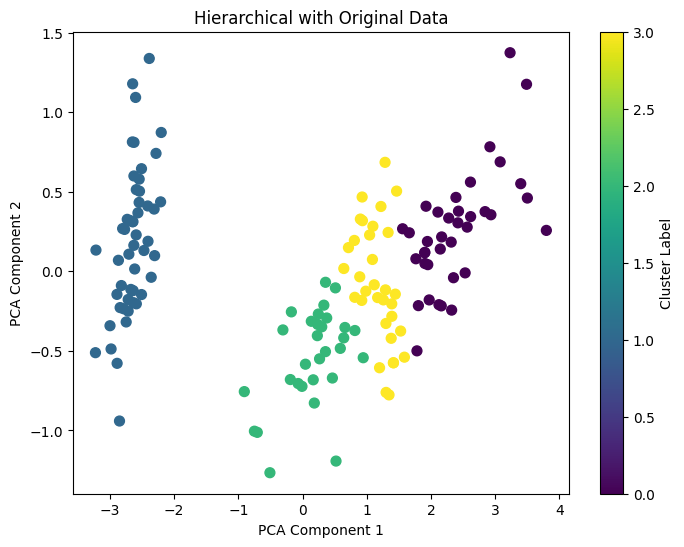


Hierarchical with Original Data (n_clusters=4)
Silhouette Score: 0.5410
Calinski-Harabasz Score: 673.9463
Davies-Bouldin Score: 0.6546



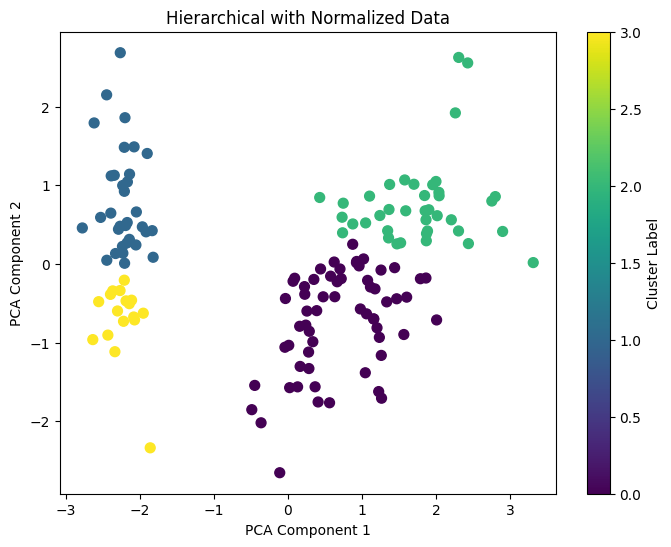


Hierarchical with Normalized Data (n_clusters=4)
Silhouette Score: 0.4487
Calinski-Harabasz Score: 254.0901
Davies-Bouldin Score: 0.7226



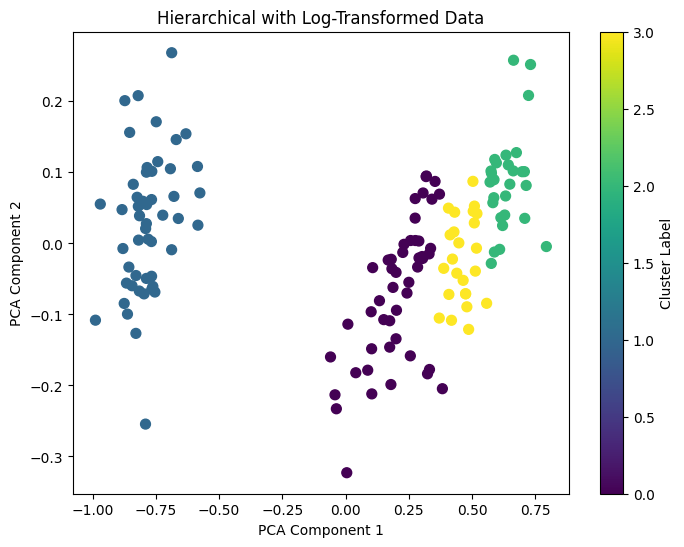


Hierarchical with Log-Transformed Data (n_clusters=4)
Silhouette Score: 0.5373
Calinski-Harabasz Score: 1050.9164
Davies-Bouldin Score: 0.6298



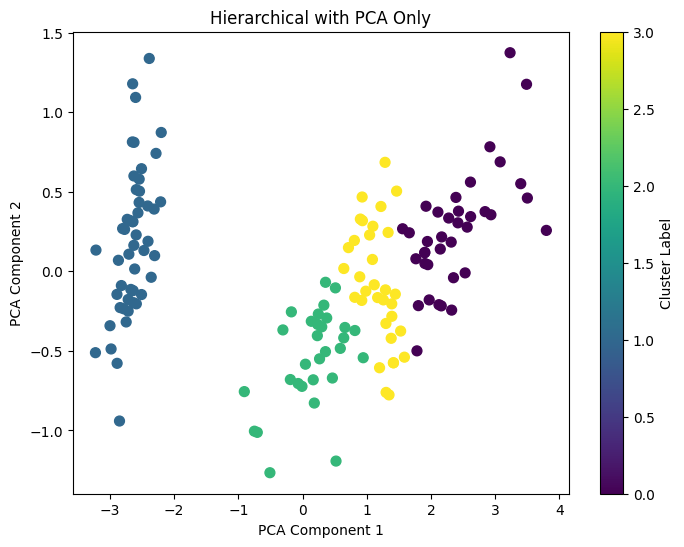


Hierarchical with PCA Only (n_clusters=4)
Silhouette Score: 0.5410
Calinski-Harabasz Score: 673.9463
Davies-Bouldin Score: 0.6546



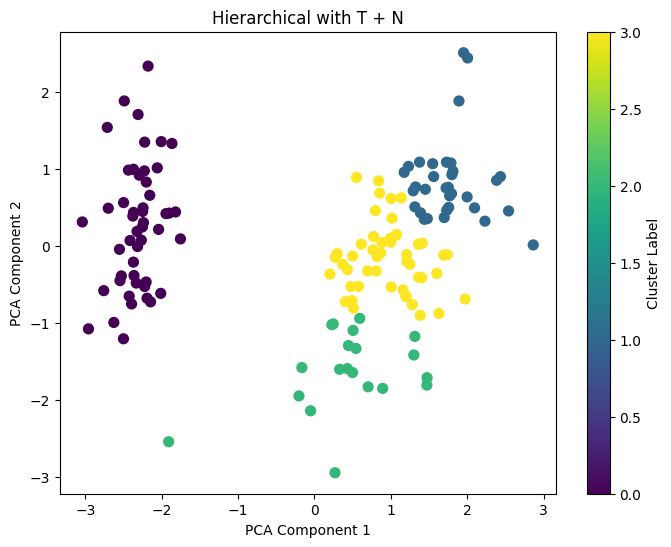


Hierarchical with T + N (n_clusters=4)
Silhouette Score: 0.4864
Calinski-Harabasz Score: 289.6747
Davies-Bouldin Score: 0.7294



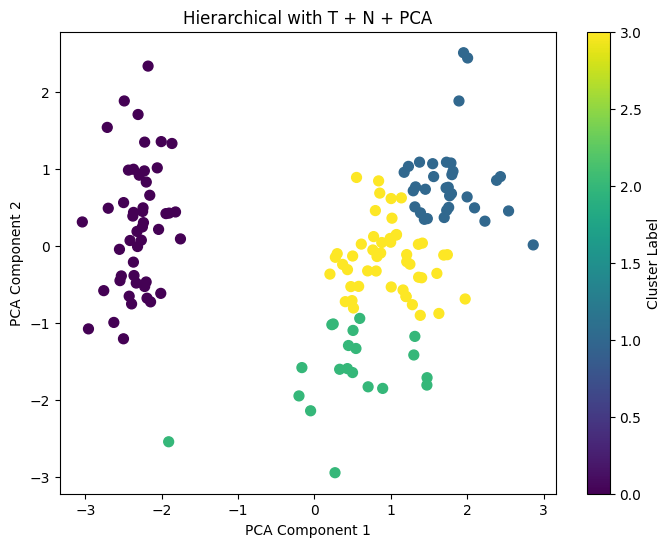


Hierarchical with T + N + PCA (n_clusters=4)
Silhouette Score: 0.4864
Calinski-Harabasz Score: 289.6747
Davies-Bouldin Score: 0.7294



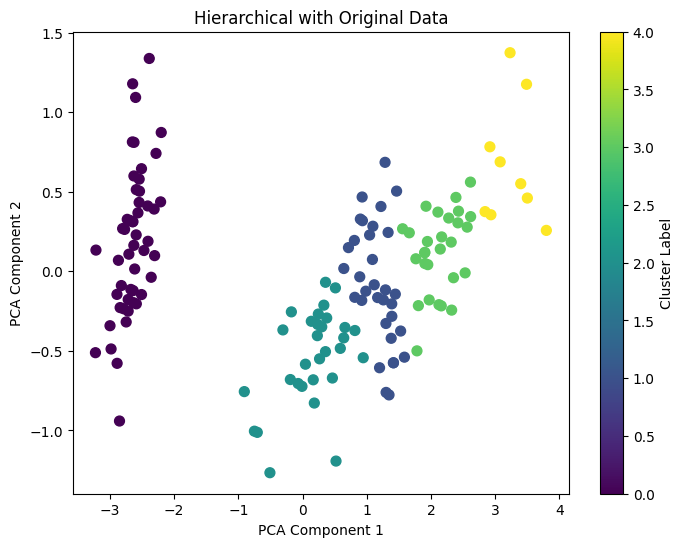


Hierarchical with Original Data (n_clusters=5)
Silhouette Score: 0.5488
Calinski-Harabasz Score: 665.8831
Davies-Bouldin Score: 0.6526



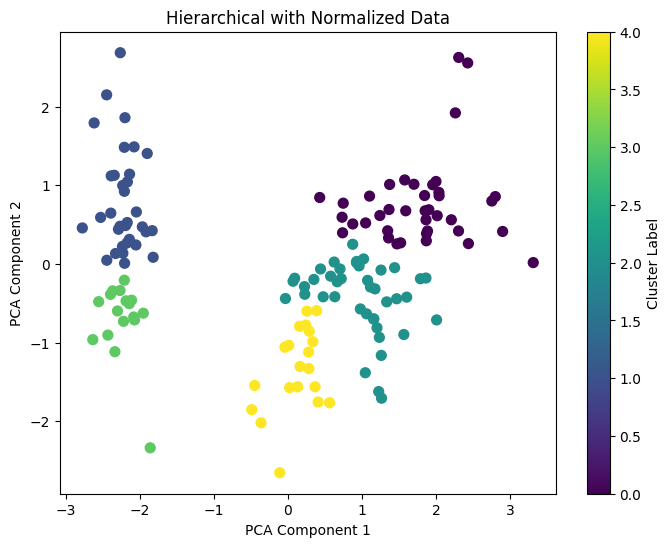


Hierarchical with Normalized Data (n_clusters=5)
Silhouette Score: 0.4042
Calinski-Harabasz Score: 254.9962
Davies-Bouldin Score: 0.7913



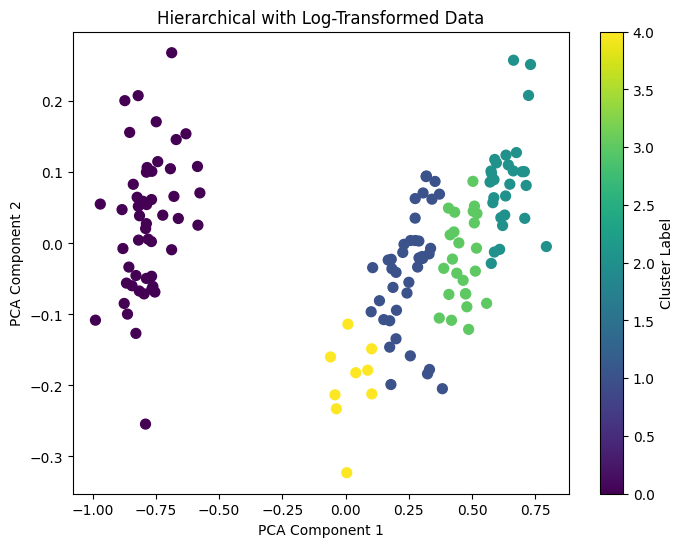


Hierarchical with Log-Transformed Data (n_clusters=5)
Silhouette Score: 0.5357
Calinski-Harabasz Score: 1044.7968
Davies-Bouldin Score: 0.6366



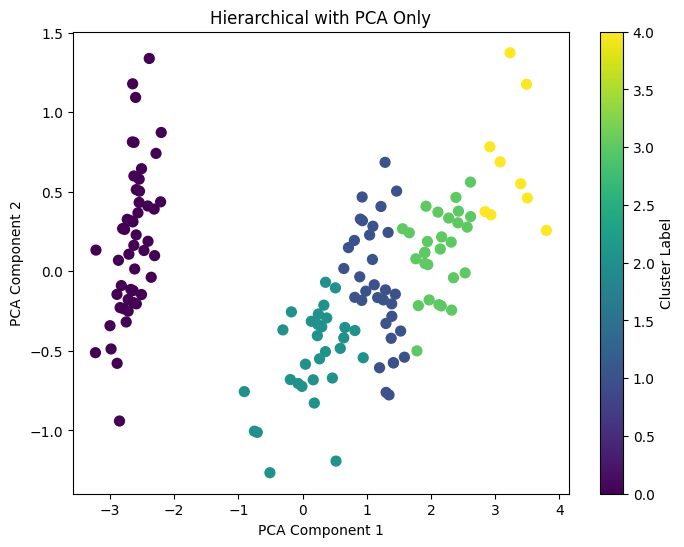


Hierarchical with PCA Only (n_clusters=5)
Silhouette Score: 0.5488
Calinski-Harabasz Score: 665.8831
Davies-Bouldin Score: 0.6526



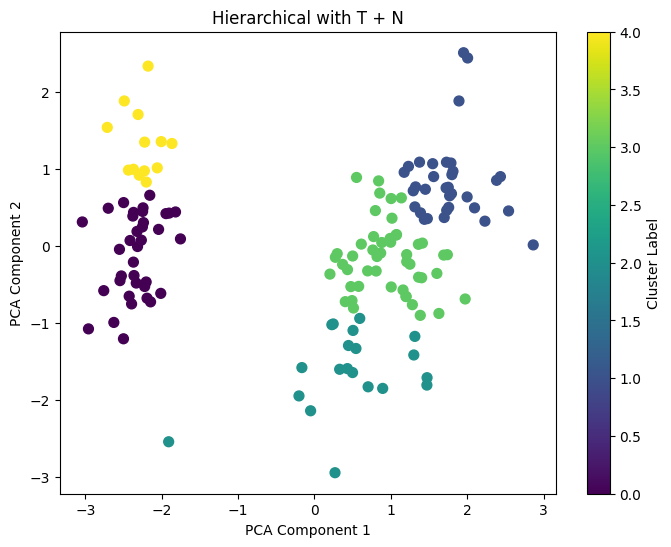


Hierarchical with T + N (n_clusters=5)
Silhouette Score: 0.4172
Calinski-Harabasz Score: 294.1426
Davies-Bouldin Score: 0.7673



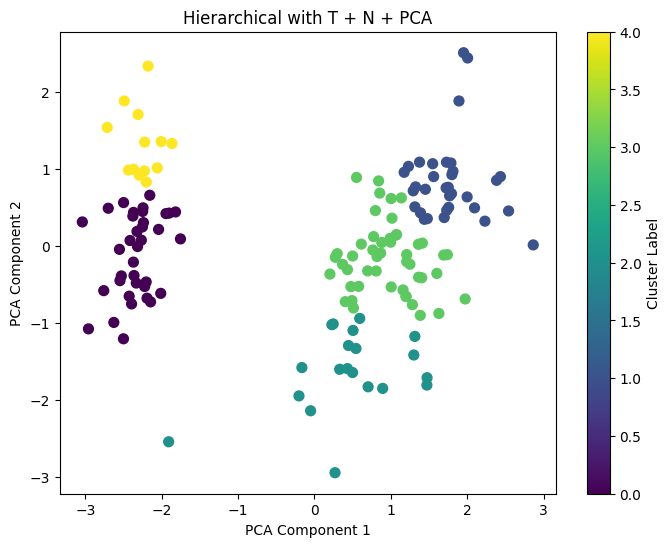


Hierarchical with T + N + PCA (n_clusters=5)
Silhouette Score: 0.4172
Calinski-Harabasz Score: 294.1426
Davies-Bouldin Score: 0.7673


Summary of Clustering Results:
                  Method  n_clusters  Silhouette Score  \
0          Original Data           3          0.598475   
1        Normalized Data           3          0.511060   
2   Log-Transformed Data           3          0.616204   
3               PCA Only           3          0.598475   
4                  T + N           3          0.536070   
5            T + N + PCA           3          0.536070   
6          Original Data           4          0.540977   
7        Normalized Data           4          0.448735   
8   Log-Transformed Data           4          0.537348   
9               PCA Only           4          0.540977   
10                 T + N           4          0.486401   
11           T + N + PCA           4          0.486401   
12         Original Data           5          0.548784   
13       Normalized D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Function to apply log transformation
def apply_transformation(X, method='log'):
    if method == 'log':
        return np.log1p(X)  # log(1 + X) to avoid negative values
    elif method == 'sqrt':
        return np.sqrt(X)  # square root transformation
    else:
        return X

# Apply PCA (for dimensionality reduction)
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Plot clusters for PCA-reduced data
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Perform Hierarchical Clustering and display metrics
def hierarchical_clustering(X, n_clusters=3, title="Hierarchical Clustering"):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = model.fit_predict(X)

    # Plot clusters
    plot_clusters(X, clusters, title)

    # Evaluation metrics
    silhouette_avg = silhouette_score(X, clusters)
    calinski_harabasz = calinski_harabasz_score(X, clusters)
    davies_bouldin = davies_bouldin_score(X, clusters)

    # Print metrics summary
    print(f"\n{title} (n_clusters={n_clusters})")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}\n")

    return silhouette_avg, calinski_harabasz, davies_bouldin

# Run Hierarchical clustering for multiple preprocessing methods
def run_hierarchical_clustering(X, cluster_values=[3, 4, 5]):
    results = {
        "Method": [], "n_clusters": [], "Silhouette Score": [],
        "Calinski-Harabasz Score": [], "Davies-Bouldin Score": []
    }

    methods = ["Original Data", "Normalized Data", "Log-Transformed Data", "PCA Only", "T + N", "T + N + PCA"]

    for n_clusters in cluster_values:
        for method in methods:
            if method == "Original Data":
                X_pca = apply_pca(X, n_components=2)
            elif method == "Normalized Data":
                scaler = StandardScaler()
                X_normalized = scaler.fit_transform(X)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "Log-Transformed Data":
                X_transformed = apply_transformation(X, method='log')
                X_pca = apply_pca(X_transformed, n_components=2)
            elif method == "PCA Only":
                X_pca = apply_pca(X, n_components=2)
            elif method == "T + N":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "T + N + PCA":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)

            # Run Hierarchical clustering and plot results
            silhouette_avg, calinski_harabasz, davies_bouldin = hierarchical_clustering(X_pca, n_clusters=n_clusters, title=f"Hierarchical with {method}")

            # Store results in the table
            results["Method"].append(method)
            results["n_clusters"].append(n_clusters)
            results["Silhouette Score"].append(silhouette_avg)
            results["Calinski-Harabasz Score"].append(calinski_harabasz)
            results["Davies-Bouldin Score"].append(davies_bouldin)

    # Create a DataFrame from the results
    df_results = pd.DataFrame(results)

    # Print the final summary table
    print("\nSummary of Clustering Results:")
    print(df_results)
    return df_results

# Run Hierarchical clustering and generate plots
hierarchical_results = run_hierarchical_clustering(X, cluster_values=[3, 4, 5])


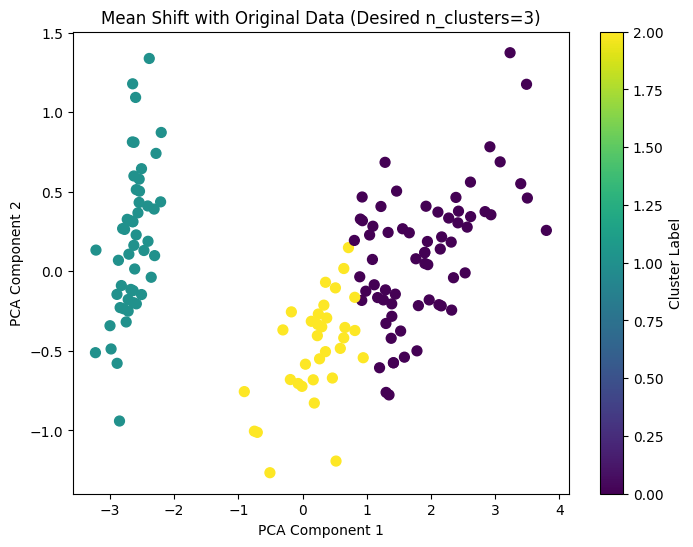


Mean Shift with Original Data (Desired n_clusters=3) (Bandwidth=0.7830)
Number of clusters: 3
Silhouette Score: 0.5624
Calinski-Harabasz Score: 614.8006
Davies-Bouldin Score: 0.5579



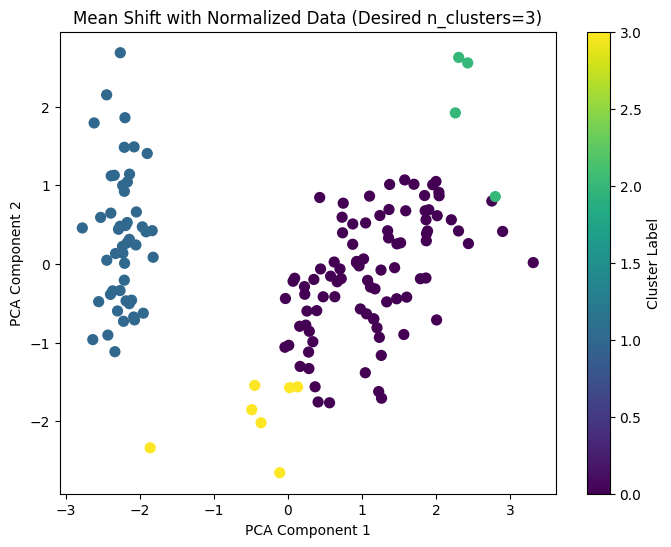


Mean Shift with Normalized Data (Desired n_clusters=3) (Bandwidth=1.0487)
Number of clusters: 4
Silhouette Score: 0.4038
Calinski-Harabasz Score: 152.6138
Davies-Bouldin Score: 0.5964



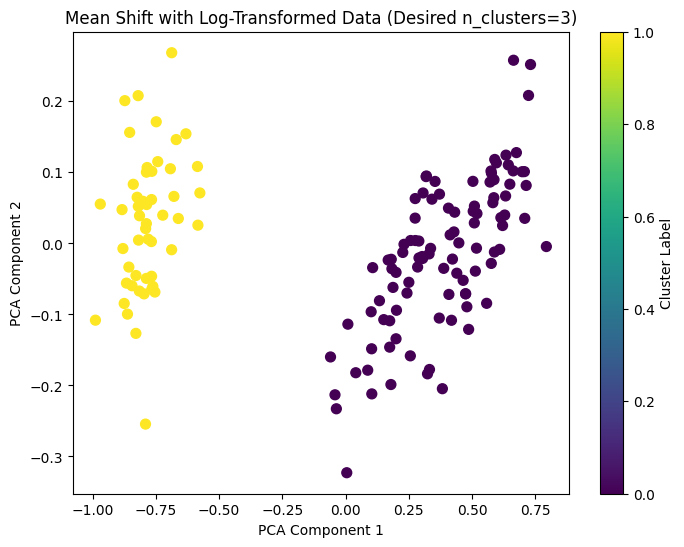


Mean Shift with Log-Transformed Data (Desired n_clusters=3) (Bandwidth=0.1714)
Number of clusters: 2
Silhouette Score: 0.7888
Calinski-Harabasz Score: 1095.3554
Davies-Bouldin Score: 0.2683



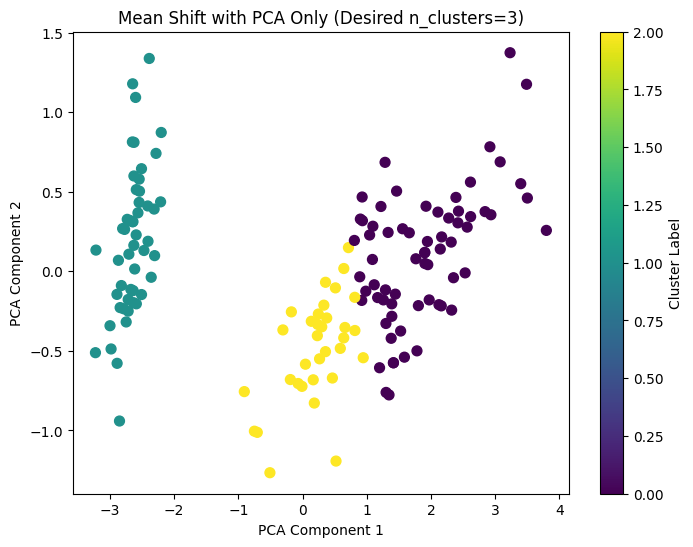


Mean Shift with PCA Only (Desired n_clusters=3) (Bandwidth=0.7830)
Number of clusters: 3
Silhouette Score: 0.5624
Calinski-Harabasz Score: 614.8006
Davies-Bouldin Score: 0.5579



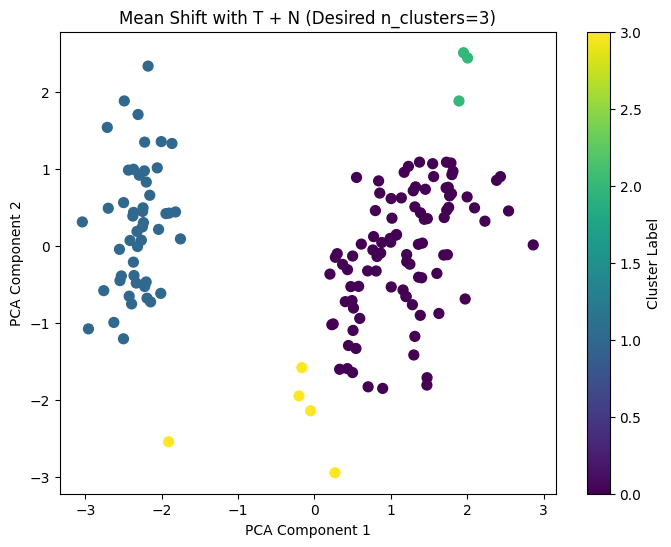


Mean Shift with T + N (Desired n_clusters=3) (Bandwidth=0.9955)
Number of clusters: 4
Silhouette Score: 0.4580
Calinski-Harabasz Score: 169.0968
Davies-Bouldin Score: 0.5474



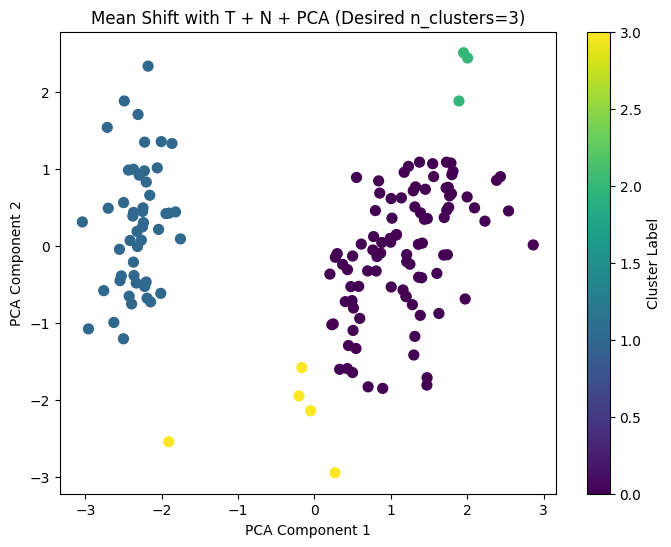


Mean Shift with T + N + PCA (Desired n_clusters=3) (Bandwidth=0.9955)
Number of clusters: 4
Silhouette Score: 0.4580
Calinski-Harabasz Score: 169.0968
Davies-Bouldin Score: 0.5474



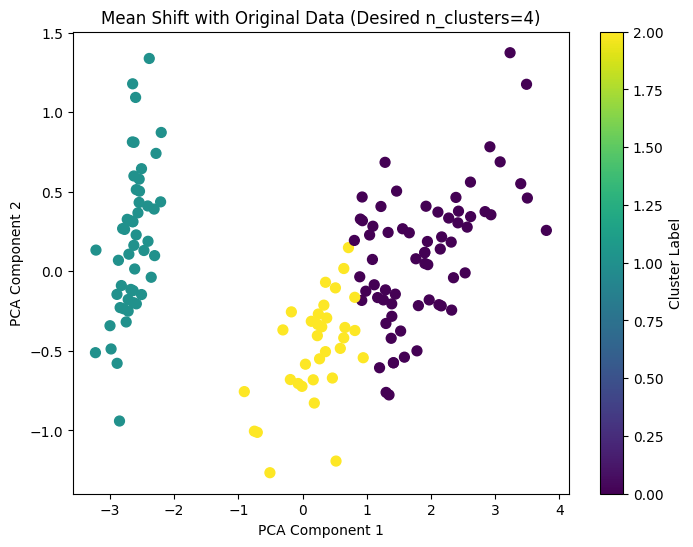


Mean Shift with Original Data (Desired n_clusters=4) (Bandwidth=0.7830)
Number of clusters: 3
Silhouette Score: 0.5624
Calinski-Harabasz Score: 614.8006
Davies-Bouldin Score: 0.5579



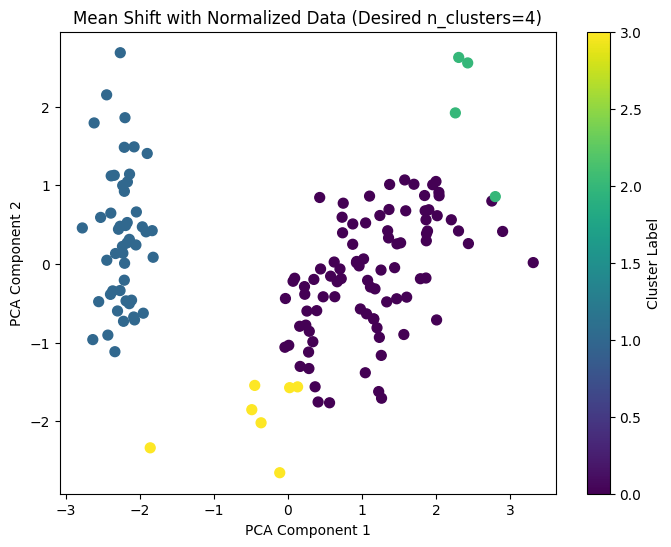


Mean Shift with Normalized Data (Desired n_clusters=4) (Bandwidth=1.0487)
Number of clusters: 4
Silhouette Score: 0.4038
Calinski-Harabasz Score: 152.6138
Davies-Bouldin Score: 0.5964



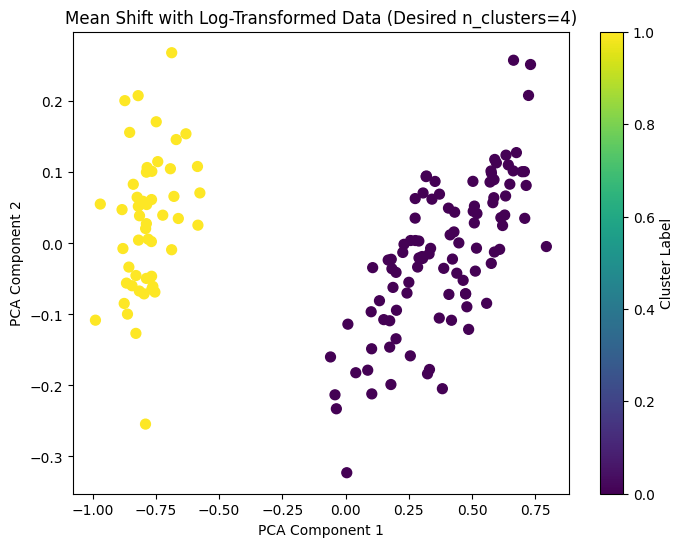


Mean Shift with Log-Transformed Data (Desired n_clusters=4) (Bandwidth=0.1714)
Number of clusters: 2
Silhouette Score: 0.7888
Calinski-Harabasz Score: 1095.3554
Davies-Bouldin Score: 0.2683



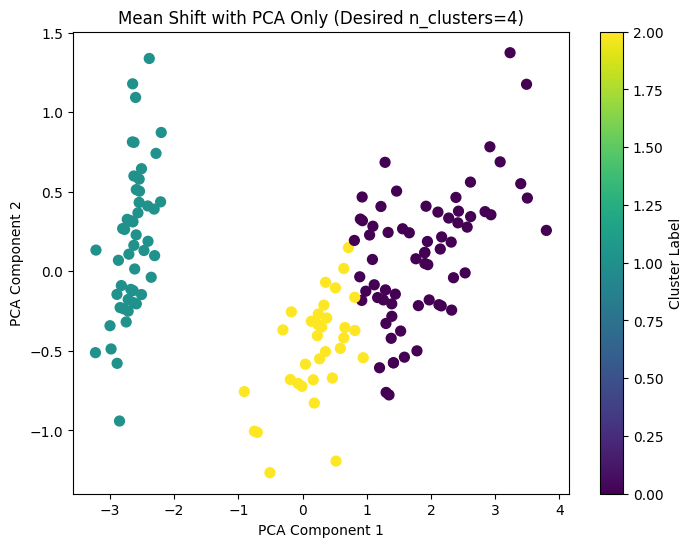


Mean Shift with PCA Only (Desired n_clusters=4) (Bandwidth=0.7830)
Number of clusters: 3
Silhouette Score: 0.5624
Calinski-Harabasz Score: 614.8006
Davies-Bouldin Score: 0.5579



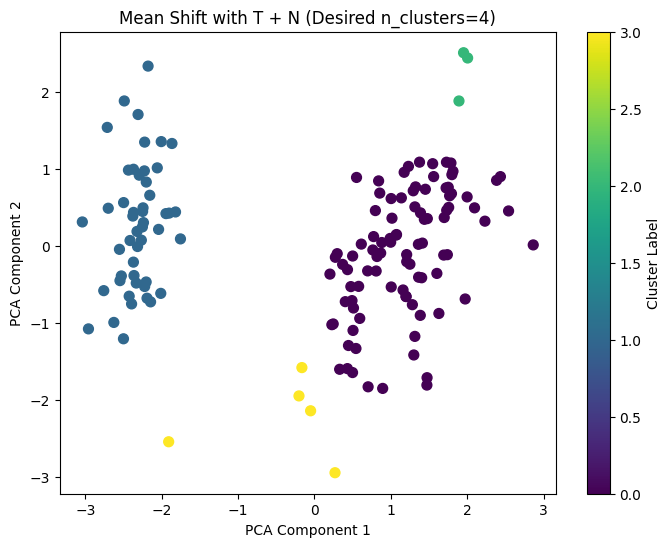


Mean Shift with T + N (Desired n_clusters=4) (Bandwidth=0.9955)
Number of clusters: 4
Silhouette Score: 0.4580
Calinski-Harabasz Score: 169.0968
Davies-Bouldin Score: 0.5474



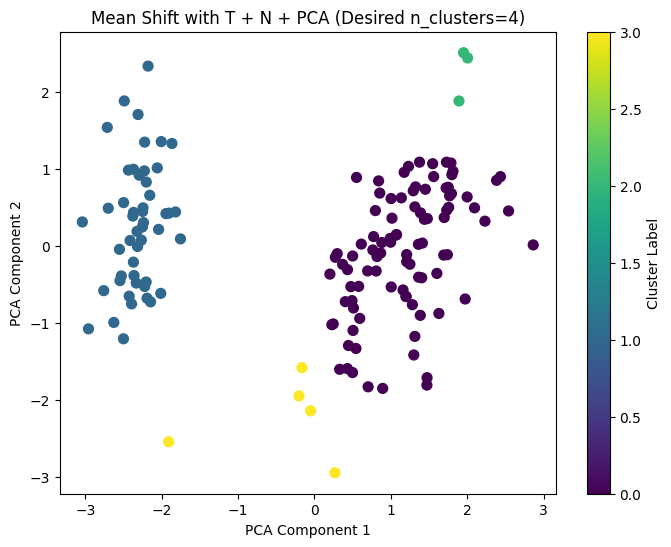


Mean Shift with T + N + PCA (Desired n_clusters=4) (Bandwidth=0.9955)
Number of clusters: 4
Silhouette Score: 0.4580
Calinski-Harabasz Score: 169.0968
Davies-Bouldin Score: 0.5474



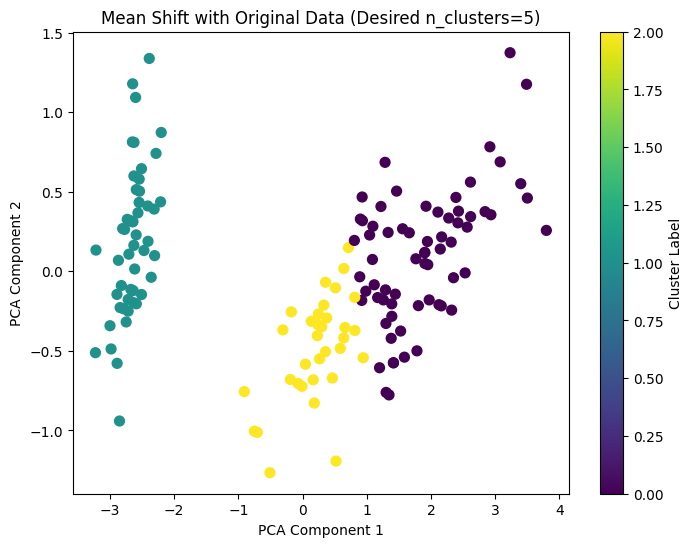


Mean Shift with Original Data (Desired n_clusters=5) (Bandwidth=0.7830)
Number of clusters: 3
Silhouette Score: 0.5624
Calinski-Harabasz Score: 614.8006
Davies-Bouldin Score: 0.5579



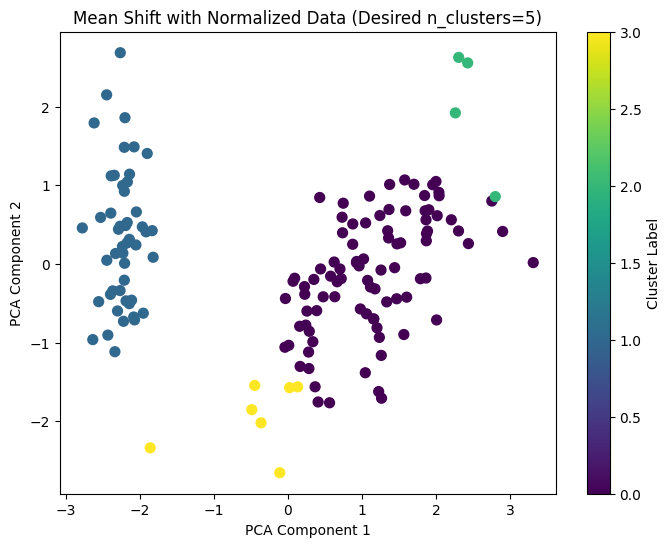


Mean Shift with Normalized Data (Desired n_clusters=5) (Bandwidth=1.0487)
Number of clusters: 4
Silhouette Score: 0.4038
Calinski-Harabasz Score: 152.6138
Davies-Bouldin Score: 0.5964



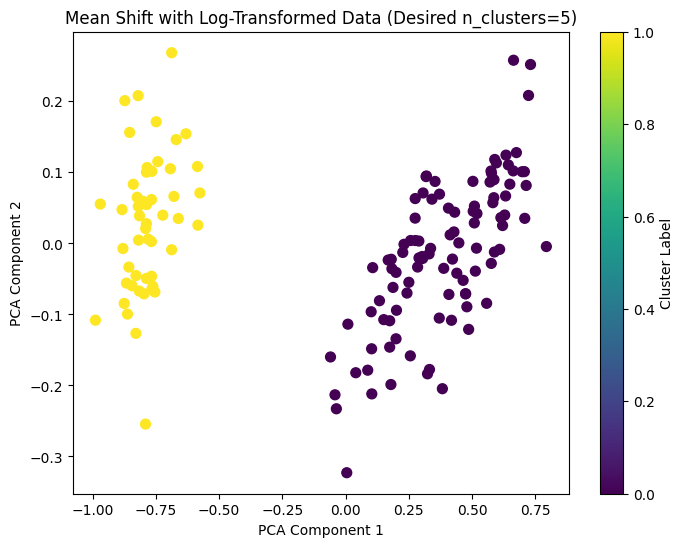


Mean Shift with Log-Transformed Data (Desired n_clusters=5) (Bandwidth=0.1714)
Number of clusters: 2
Silhouette Score: 0.7888
Calinski-Harabasz Score: 1095.3554
Davies-Bouldin Score: 0.2683



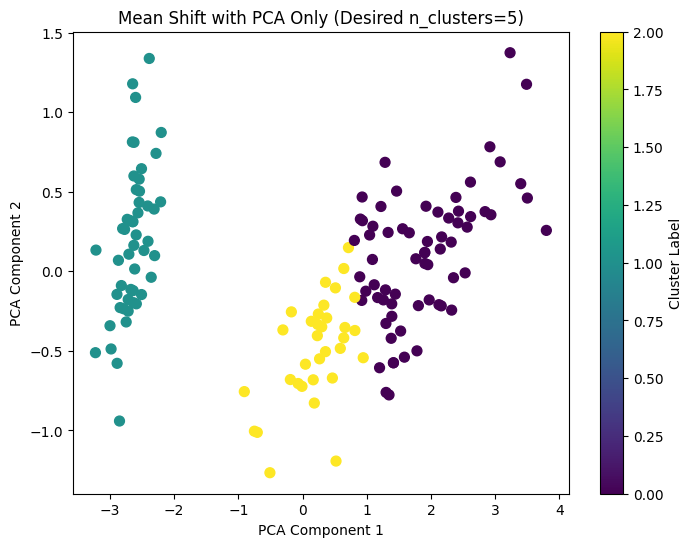


Mean Shift with PCA Only (Desired n_clusters=5) (Bandwidth=0.7830)
Number of clusters: 3
Silhouette Score: 0.5624
Calinski-Harabasz Score: 614.8006
Davies-Bouldin Score: 0.5579



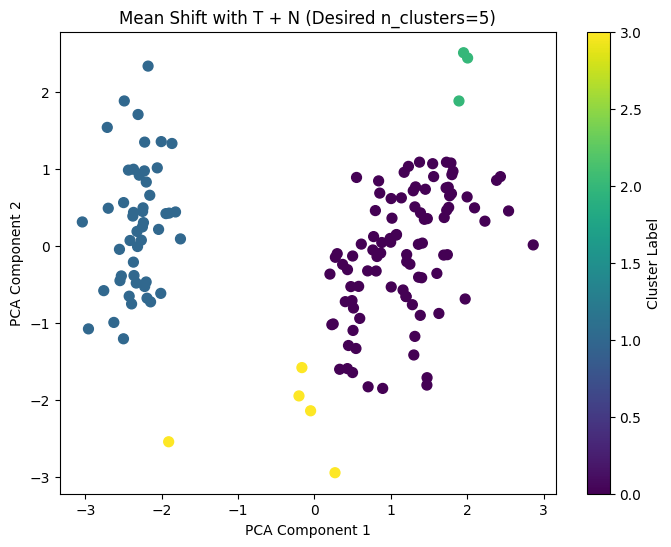


Mean Shift with T + N (Desired n_clusters=5) (Bandwidth=0.9955)
Number of clusters: 4
Silhouette Score: 0.4580
Calinski-Harabasz Score: 169.0968
Davies-Bouldin Score: 0.5474



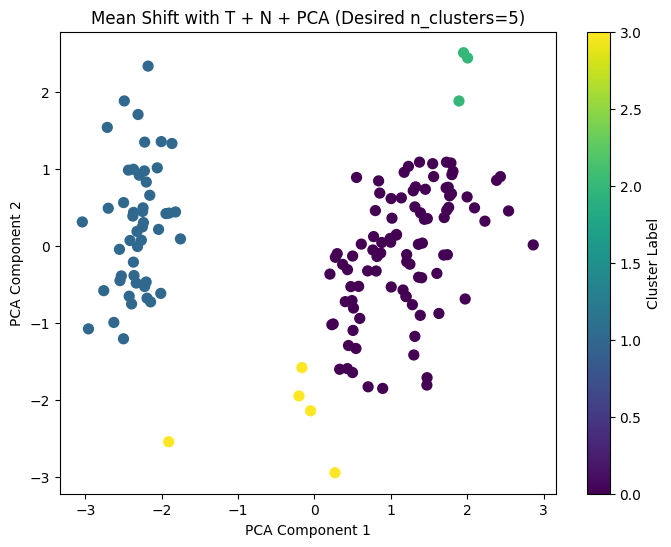


Mean Shift with T + N + PCA (Desired n_clusters=5) (Bandwidth=0.9955)
Number of clusters: 4
Silhouette Score: 0.4580
Calinski-Harabasz Score: 169.0968
Davies-Bouldin Score: 0.5474


Summary of Clustering Results:
    Desired n_clusters  Actual n_clusters  Silhouette Score  \
0                    3                  3          0.562392   
1                    3                  4          0.403768   
2                    3                  2          0.788752   
3                    3                  3          0.562392   
4                    3                  4          0.457973   
5                    3                  4          0.457973   
6                    4                  3          0.562392   
7                    4                  4          0.403768   
8                    4                  2          0.788752   
9                    4                  3          0.562392   
10                   4                  4          0.457973   
11                   4        

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Function to apply log transformation
def apply_transformation(X, method='log'):
    if method == 'log':
        return np.log1p(X)  # log(1 + X) to avoid negative values
    elif method == 'sqrt':
        return np.sqrt(X)  # square root transformation
    else:
        return X

# Apply PCA (for dimensionality reduction)
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Plot clusters for PCA-reduced data
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Perform Mean Shift Clustering and display metrics
def mean_shift_clustering(X, bandwidth=None, title="Mean Shift Clustering"):
    if bandwidth is None:
        bandwidth = estimate_bandwidth(X, quantile=0.2)

    model = MeanShift(bandwidth=bandwidth)
    clusters = model.fit_predict(X)
    n_clusters = len(np.unique(clusters))

    # Plot clusters
    plot_clusters(X, clusters, title)

    # Only calculate metrics if more than one cluster is found
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X, clusters)
        calinski_harabasz = calinski_harabasz_score(X, clusters)
        davies_bouldin = davies_bouldin_score(X, clusters)

        # Print metrics summary
        print(f"\n{title} (Bandwidth={bandwidth:.4f})")
        print(f"Number of clusters: {n_clusters}")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
        print(f"Davies-Bouldin Score: {davies_bouldin:.4f}\n")

        return clusters, silhouette_avg, calinski_harabasz, davies_bouldin
    else:
        print(f"\n{title} (Bandwidth={bandwidth:.4f})")
        print(f"Number of clusters: {n_clusters}")
        print("Only one cluster found. Metrics cannot be computed.\n")
        return clusters, None, None, None

# Run Mean Shift clustering with desired number of clusters (simulated by adjusting bandwidth)
def run_mean_shift_clustering(X, cluster_values=[2, 3, 4]):
    results = {
        "Desired n_clusters": [],
        "Actual n_clusters": [],
        "Silhouette Score": [],
        "Calinski-Harabasz Score": [],
        "Davies-Bouldin Score": []
    }

    methods = ["Original Data", "Normalized Data", "Log-Transformed Data", "PCA Only", "T + N", "T + N + PCA"]

    for n_clusters in cluster_values:
        for method in methods:
            if method == "Original Data":
                X_pca = apply_pca(X, n_components=2)
            elif method == "Normalized Data":
                scaler = StandardScaler()
                X_normalized = scaler.fit_transform(X)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "Log-Transformed Data":
                X_transformed = apply_transformation(X, method='log')
                X_pca = apply_pca(X_transformed, n_components=2)
            elif method == "PCA Only":
                X_pca = apply_pca(X, n_components=2)
            elif method == "T + N":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "T + N + PCA":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)

            # Run Mean Shift clustering and plot results
            clusters, silhouette_avg, calinski_harabasz, davies_bouldin = mean_shift_clustering(X_pca, title=f"Mean Shift with {method} (Desired n_clusters={n_clusters})")

            # Store results in the table only if more than one cluster is found
            if silhouette_avg is not None:
                results["Desired n_clusters"].append(n_clusters)
                results["Actual n_clusters"].append(len(np.unique(clusters)))
                results["Silhouette Score"].append(silhouette_avg)
                results["Calinski-Harabasz Score"].append(calinski_harabasz)
                results["Davies-Bouldin Score"].append(davies_bouldin)

    # Create a DataFrame from the results
    df_results = pd.DataFrame(results)

    # Print the final summary table
    print("\nSummary of Clustering Results:")
    print(df_results)
    return df_results

# Run Mean Shift clustering with specified desired cluster values
mean_shift_results = run_mean_shift_clustering(X, cluster_values=[3, 4, 5])


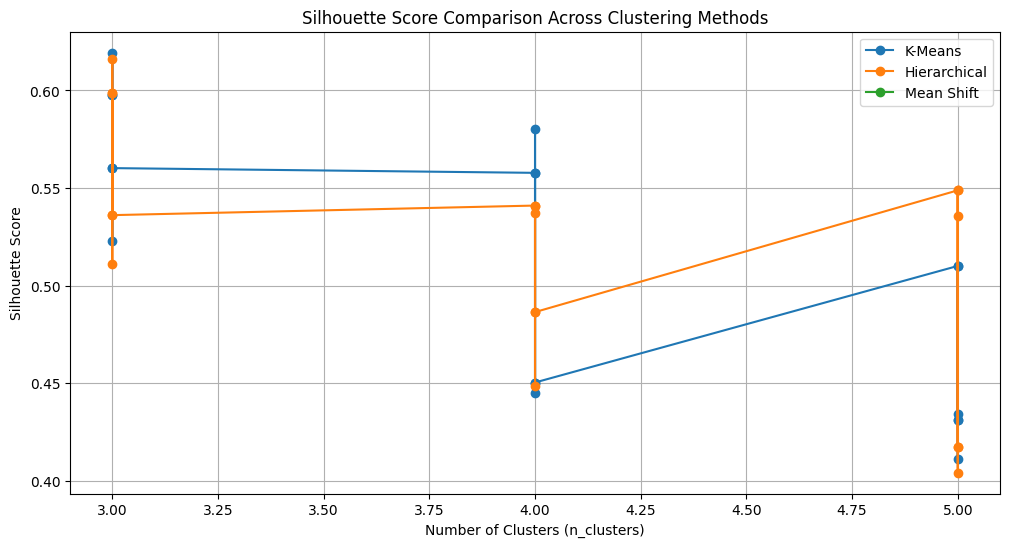

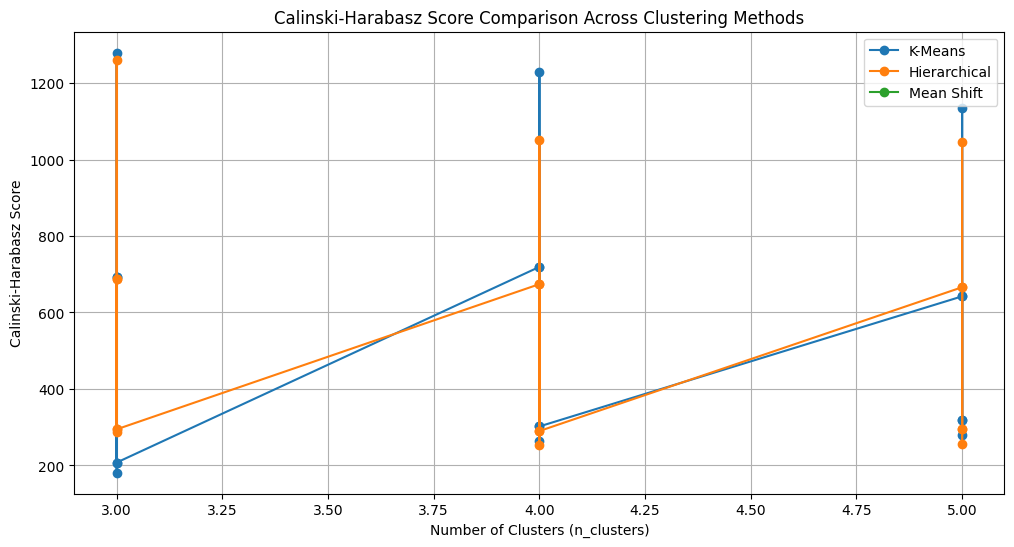

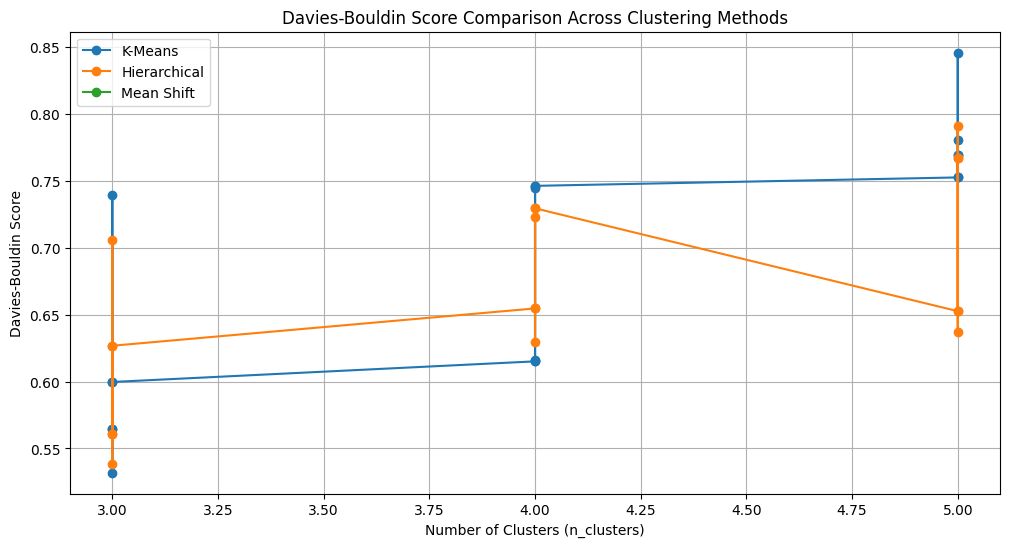


--- Final Comparison Across Methods ---

          Method  n_clusters  Silhouette Score  Calinski-Harabasz Score  \
0        K-Means         3.0          0.597676               693.708433   
1        K-Means         3.0          0.522791               180.975460   
2        K-Means         3.0          0.619360              1279.725890   
3        K-Means         3.0          0.597676               693.708433   
4        K-Means         3.0          0.560168               207.244374   
5        K-Means         3.0          0.560168               207.244374   
6        K-Means         4.0          0.557741               719.123544   
7        K-Means         4.0          0.445187               263.884045   
8        K-Means         4.0          0.580323              1230.058361   
9        K-Means         4.0          0.557741               719.123544   
10       K-Means         4.0          0.450322               301.714865   
11       K-Means         4.0          0.450322            

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to summarize clustering results across methods
def summarize_clustering_results(kmeans_df, hierarchical_df, mean_shift_df):
    # Combine all results into one DataFrame for comparison
    comparison_df = pd.concat([
        kmeans_df.assign(Method='K-Means'),
        hierarchical_df.assign(Method='Hierarchical'),
        mean_shift_df.assign(Method='Mean Shift')
    ])

    # Plot the Silhouette Scores for comparison across methods and cluster numbers
    plt.figure(figsize=(12, 6))
    for method in comparison_df['Method'].unique():
        subset = comparison_df[comparison_df['Method'] == method]
        plt.plot(subset['n_clusters'], subset['Silhouette Score'], label=method, marker='o')

    plt.title('Silhouette Score Comparison Across Clustering Methods')
    plt.xlabel('Number of Clusters (n_clusters)')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the Calinski-Harabasz Score for comparison across methods
    plt.figure(figsize=(12, 6))
    for method in comparison_df['Method'].unique():
        subset = comparison_df[comparison_df['Method'] == method]
        plt.plot(subset['n_clusters'], subset['Calinski-Harabasz Score'], label=method, marker='o')

    plt.title('Calinski-Harabasz Score Comparison Across Clustering Methods')
    plt.xlabel('Number of Clusters (n_clusters)')
    plt.ylabel('Calinski-Harabasz Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the Davies-Bouldin Score for comparison across methods
    plt.figure(figsize=(12, 6))
    for method in comparison_df['Method'].unique():
        subset = comparison_df[comparison_df['Method'] == method]
        plt.plot(subset['n_clusters'], subset['Davies-Bouldin Score'], label=method, marker='o')

    plt.title('Davies-Bouldin Score Comparison Across Clustering Methods')
    plt.xlabel('Number of Clusters (n_clusters)')
    plt.ylabel('Davies-Bouldin Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display the combined DataFrame for final comparison
    print("\n--- Final Comparison Across Methods ---\n")
    print(comparison_df)

    return comparison_df

# Now run the conclusion summary using the results from each method
# Assuming that the variables kmeans_results, hierarchical_results, and mean_shift_results exist
summary_results = summarize_clustering_results(kmeans_results, hierarchical_results, mean_shift_results)
